In [212]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score, make_scorer 
from sklearn.model_selection import cross_val_score, train_test_split
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.base import BaseEstimator
%matplotlib inline

In [2]:
from sklearn.datasets import make_circles, make_moons, make_classification

In [3]:
datasets = [make_circles(noise = 0.2, factor = 0.5, random_state = 42), make_moons(noise = 0.2, random_state = 42), 
           make_classification(n_classes = 3, n_clusters_per_class = 1, n_features = 2, class_sep = .8, random_state = 3, n_redundant = 0., )]

In [15]:
palette = sns.color_palette(n_colors = 3);
cmap = ListedColormap(palette);

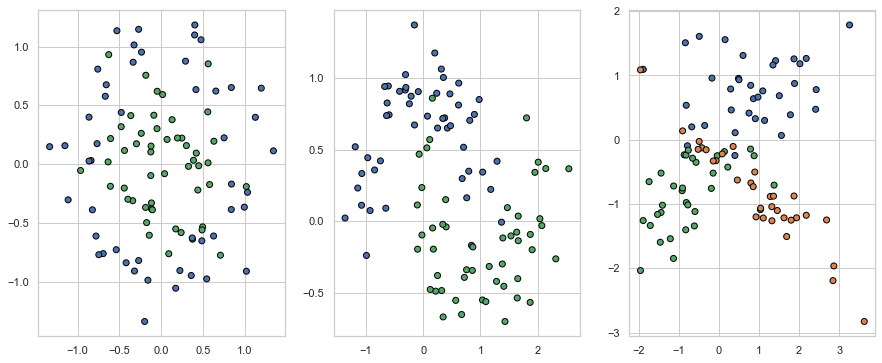

In [21]:
plt.figure(figsize = (15, 6))
for i, data in enumerate(datasets):
    plt.subplot(1, 3, i+1);
    plt.scatter(data[0][:, 0], data[0][:, 1], c = data[1], cmap = cmap, edgecolor = 'black');

In [22]:
#1 - построить разделяющие поверхности для каждого датасета
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
clf = DecisionTreeRegressor(random_state = 42);
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors = len(np.unique(y)));
    cmap = ListedColormap(palette);
    xx, yy = np.meshgrid(np.arange(min(X[:, 0]) - 1, max(X[:, 0]) + 1, plot_step), 
                        np.arange(min(X[:, 1]) - 1, max(X[:, 1]) + 1, plot_step));
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape);
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad = 2.5);
    plt.contourf(xx, yy, predicted, cmap = cmap, alpha = .8);
    plt.scatter(X[:, 0], X[:, 1], c = y, alpha = .8, edgecolor = np.array(palette)[y]);
    return r2_score(y, clf.predict(X))

(452, 469)


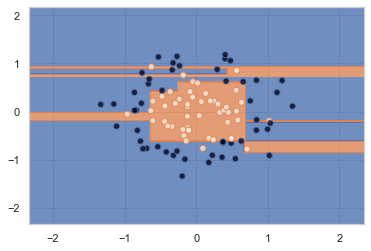

In [68]:
clf.fit(datasets[0][0], datasets[0][1]);
plot_surface(clf, datasets[0][0], datasets[0][1]);
plt.show()

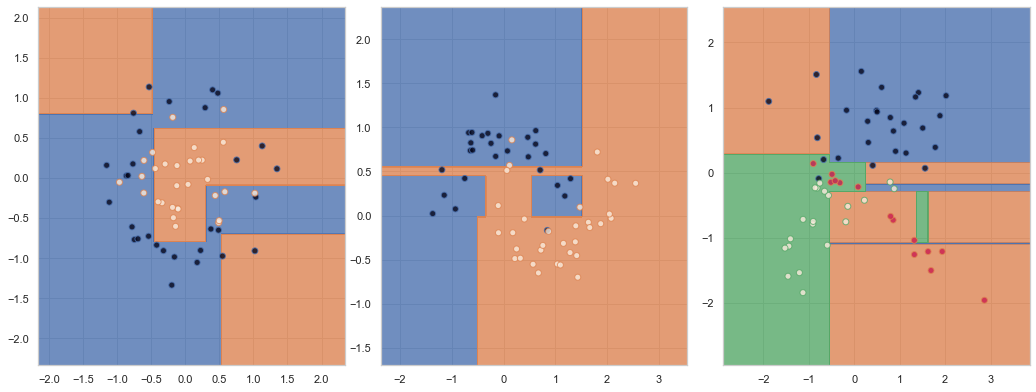

In [83]:
from sklearn.model_selection import train_test_split
plt.figure(figsize = (15, 6))
def plot_all(datasets):
    accuracy = []
    for i, data in enumerate(datasets):
        clf = DecisionTreeClassifier(random_state = 42);
        X, y = data;
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.4)
        clf.fit(X_train, y_train)
        plt.subplot(1, len(datasets), i+1);
        train = accuracy_score(y_train, clf.predict(X_train));
        test = plot_surface(clf, X_test, y_test);
        accuracy.append((train, test))
    return accuracy
results = plot_all(datasets)
plt.show()

In [74]:
results

[(1.0, 0.7), (1.0, 0.9166666666666666), (1.0, 0.8166666666666667)]

In [39]:
#2 - перебор параметров
X, y = datasets[0]
from sklearn.model_selection import GridSearchCV, KFold
parameters = {'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 10, 24]};
cv = KFold(shuffle = False, random_state = 42, n_splits = 3);
rgr = DecisionTreeClassifier(random_state = 42)
gcCV = GridSearchCV(rgr, param_grid = parameters, cv = cv, scoring = 'r2');
gcCV.fit(X, y)
gcCV.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [33]:
def plot_2(data, parameters):
    X, y = data;
    k = 1;
    accuracy = [];
    for i, depth in enumerate(parameters['max_depth']):
        for j, leaf in enumerate(parameters['min_samples_leaf']):
            model = DecisionTreeClassifier(random_state = 42, max_depth = depth, min_samples_leaf = leaf);
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42);
            model.fit(X_train, y_train);
            train = r2_score(y_train, model.predict(X_train));
            plt.subplot(3, 3, k);
            test = plot_surface(model, X_test, y_test)
            plt.title('max_depth - %d'%depth + ', ' 'min_samples_leaf - %d'%leaf);
            plt.xlabel('Feature - 1.');
            plt.ylabel('Feature - 2.');
            plt.legend();
            k += 1;
            accuracy.append((train, test));
    return np.array(accuracy)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[ 0.79166667 -0.0989011 ]
 [ 0.09722222 -0.20879121]
 [-0.38888889 -1.41758242]
 [ 1.          0.01098901]
 [ 0.09722222 -0.20879121]
 [-0.38888889 -1.41758242]
 [ 1.          0.01098901]
 [ 0.09722222 -0.20879121]
 [-0.38888889 -1.41758242]]


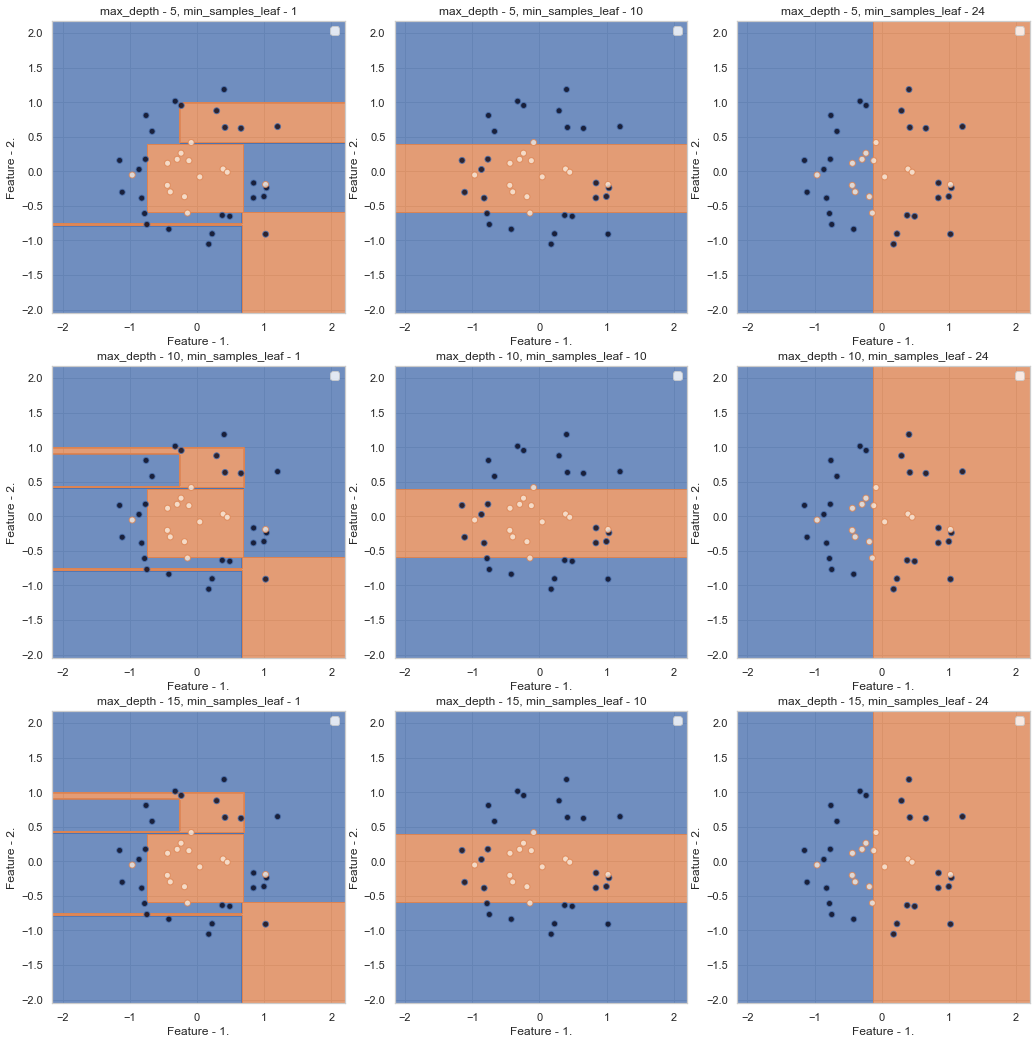

In [42]:
plt.figure(figsize = (15, 15));
circle = plot_2(datasets[0], parameters);
print(circle)

In [45]:
gcCV.fit(X, y)
gcCV.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[ 1.          0.12087912]
 [ 0.51388889 -0.20879121]
 [ 0.375       0.12087912]
 [ 1.          0.12087912]
 [ 0.51388889 -0.20879121]
 [ 0.375       0.12087912]
 [ 1.          0.12087912]
 [ 0.51388889 -0.20879121]
 [ 0.375       0.12087912]]


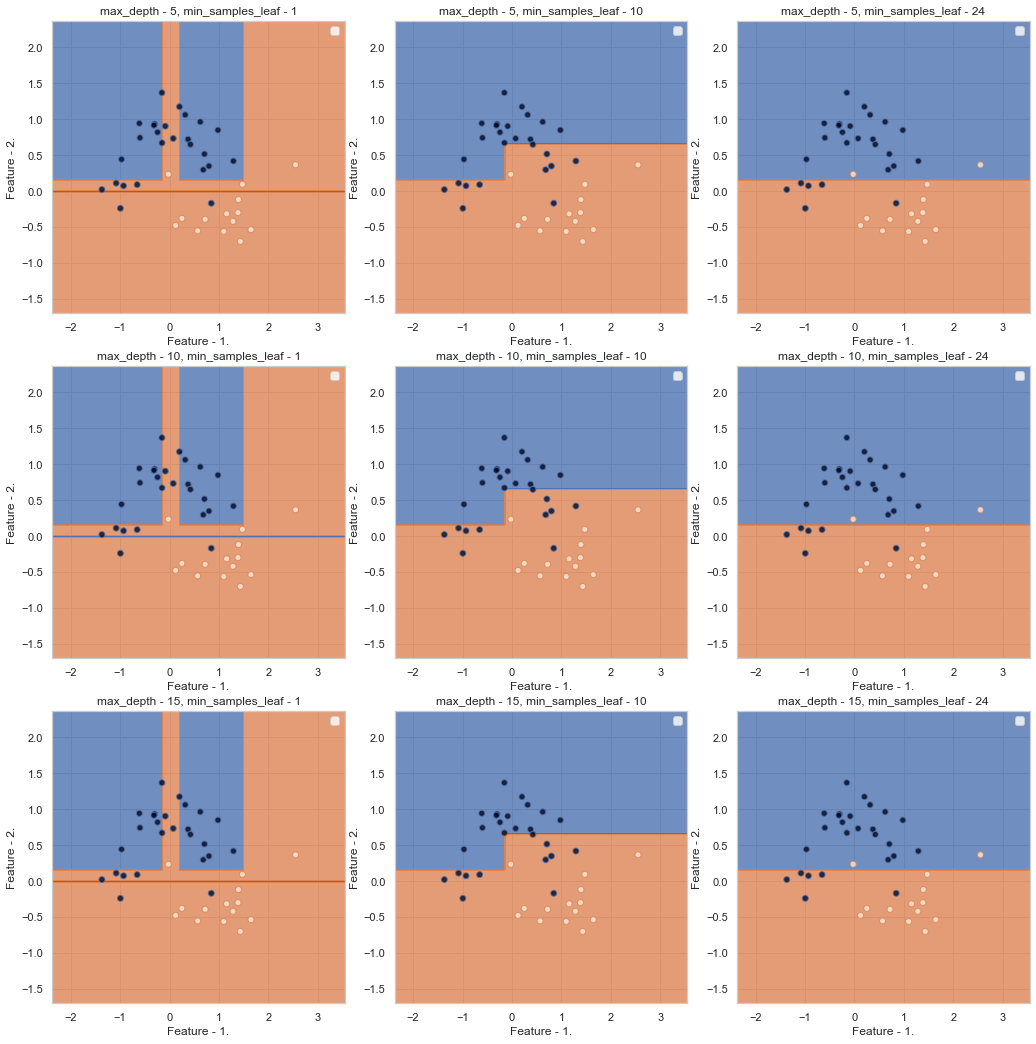

In [43]:
plt.figure(figsize = (15, 15));
moon = plot_2(datasets[1], parameters);
print(moon);

In [46]:
gcCV.fit(datasets[1][0], datasets[1][1])
gcCV.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[ 0.97461929  0.37254902]
 [ 0.82233503  0.56862745]
 [-0.11675127  0.17647059]
 [ 1.          0.33333333]
 [ 0.82233503  0.56862745]
 [-0.11675127  0.17647059]
 [ 1.          0.33333333]
 [ 0.82233503  0.56862745]
 [-0.11675127  0.17647059]]


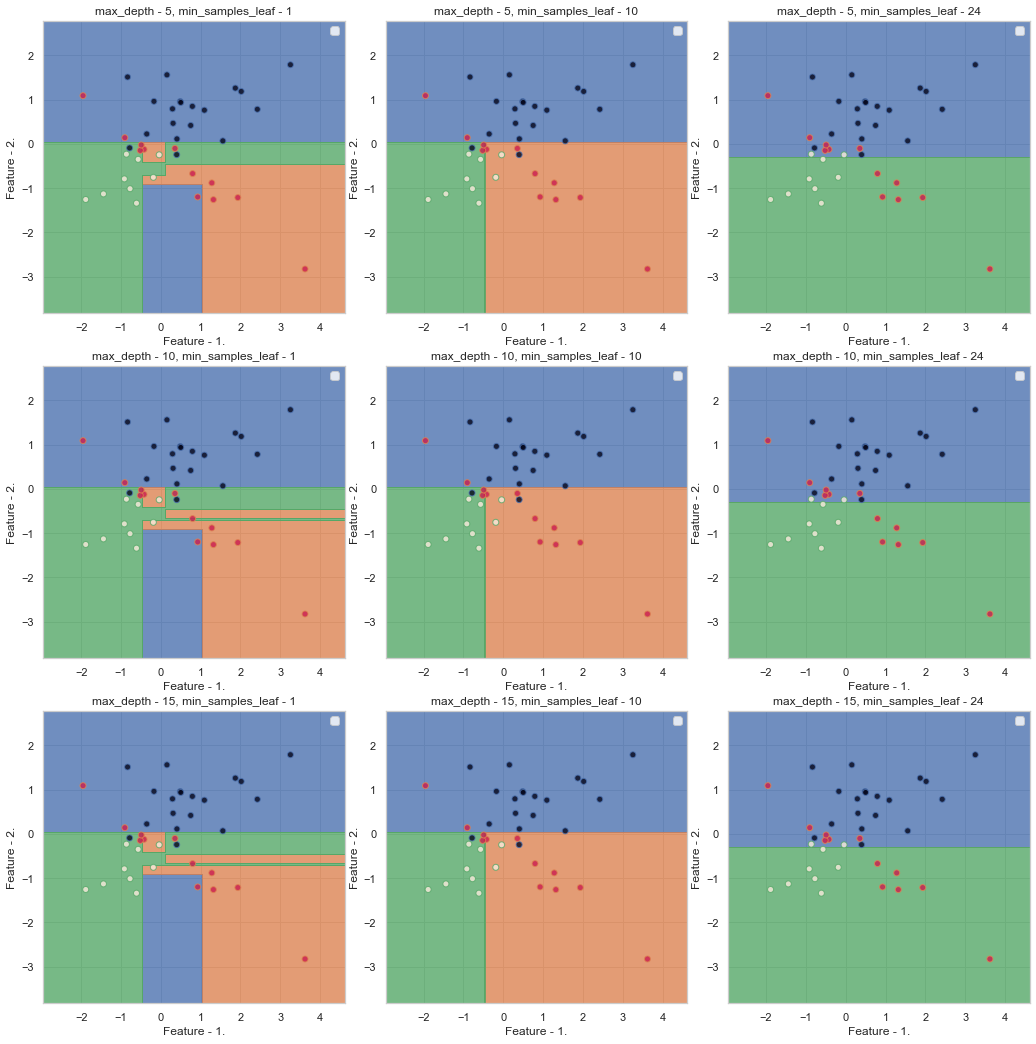

In [44]:
plt.figure(figsize = (15, 15));
make_class = plot_2(datasets[2], parameters);
print(make_class)

In [47]:
gcCV.fit(datasets[2][0], datasets[2][1])
gcCV.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

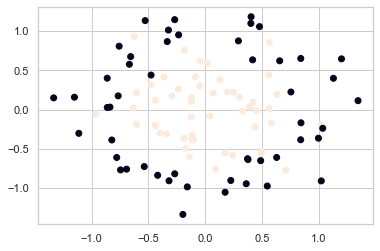

In [201]:
X, y = datasets[0]
plt.scatter(X[:, 0], X[:, 1], c = y);
plt.show()

In [136]:
def many(X, y):
    r_l_1, r_r_1, r_l_0, r_r_0 = [], [], [], [];
    t = (X[:-1] + X[1:]) / 2;
    for i in range(X.shape[1]):
        for m in t[:, i]:
            r_l_1.append(sum(y[np.where(X[:, i] < m)] == 1));
            r_r_1.append(sum(y[np.where(X[:, i] > m)] == 1));
            r_l_0.append(sum(y[np.where(X[:, i] < m)] == 0));
            r_r_0.append(sum(y[np.where(X[:, i] > m)] == 0));
    r_l_1, r_l_0 = np.asarray(r_l_1), np.asarray(r_l_0);   
    r_r_1, r_r_0 = np.asarray(r_r_1), np.asarray(r_r_0);
    H_r_l = 1 - (r_l_1 / (r_l_1+r_l_0))**2 - (r_l_0 / (r_l_1+r_l_0))**2;
    H_r_r = 1 - (r_r_1 / (r_r_1+r_r_0))**2 - (r_r_0 / (r_r_1+r_r_0))**2;
    Q = -((r_l_1 + r_l_0) / X.shape[0]) * H_r_l - ((r_r_1 + r_r_0) / X.shape[0]) * H_r_r
    return(Q)

In [1830]:
#часть 2.1
def one(X, y):
    #print(X);
    #print(y)
    if len(np.unique(X)) == 1:
        thresholds, ginis, threshold_best, gini_best = None, None, None, None
        return (thresholds, ginis, threshold_best, gini_best)
    #print(X)
    r_l_1, r_r_1, r_l_0, r_r_0 = [], [], [], [];
    t = (X[:-1] + X[1:]) / 2;
    un = np.unique(y);
    #print(X)
    dele = []
    for i, m in enumerate(t):
        if (sum(X < m) == 0 or sum(X > m) == 0):#защита от пустого подмножества   
            dele.append(i);
            continue
        r_l_1.append(sum(y[np.where(X < m)] == un[1]));
        r_r_1.append(sum(y[np.where(X > m)] == un[1]));
        r_l_0.append(sum(y[np.where(X < m)] == un[0]));
        r_r_0.append(sum(y[np.where(X > m)] == un[0]));
    t = np.delete(t, dele)
    r_l_1, r_l_0 = np.asarray(r_l_1), np.asarray(r_l_0);  
    r_r_1, r_r_0 = np.asarray(r_r_1), np.asarray(r_r_0);
    H_r_l = 1 - (r_l_1 / (r_l_1+r_l_0))**2 - (r_l_0 / (r_l_1+r_l_0))**2;
    H_r_r = 1 - (r_r_1 / (r_r_1+r_r_0))**2 - (r_r_0 / (r_r_1+r_r_0))**2;
    Q = -((r_l_1 + r_l_0) / X.shape[0]) * H_r_l - ((r_r_1 + r_r_0) / X.shape[0]) * H_r_r;
    thresholds = np.sort(t);
    ginis = np.round(Q[np.argsort(t)], 3);
    #print(ginis)
    gini_best = max(ginis);
    threshold_best = thresholds[np.argmax(ginis)];
    if sum(ginis == gini_best) != 1:
        k = np.where(ginis == gini_best);
        thes_best = thresholds[k];
        r = []
        for m in thes_best:
            r.append((sum(X < m), sum(X > m)));
        r = np.asarray(r);
        k_min = np.argmin(np.amax(r, axis = 1) / np.amin(r, axis = 1));
        threshold_best = thes_best[k_min]
    #print(gini_best)
    return (thresholds, ginis, threshold_best, gini_best)

In [535]:
data = pd.read_csv('students.csv');
X = data.drop(['target'], axis = 1);
y = data['target'];
feature = X.columns.values;

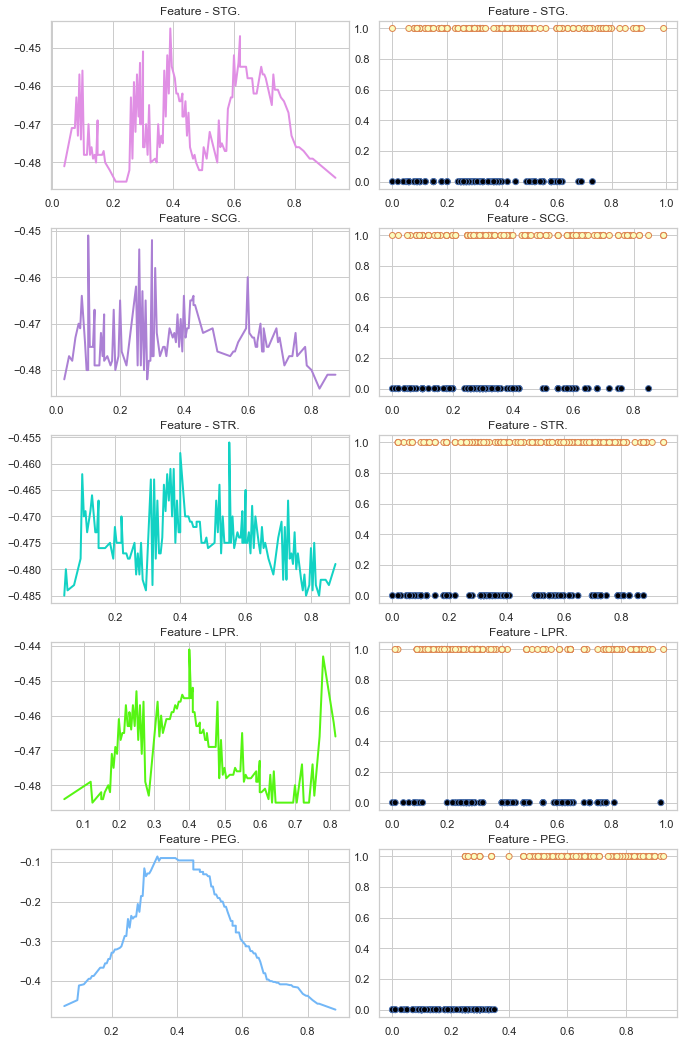

In [536]:
plt.figure(figsize = (10, 15));
X = X.values
y = y.values
color = np.random.uniform(0, 1, size = (X.shape[1], 3));
k, k_1 = 1, 2;
pal = sns.color_palette(n_colors = len(np.unique(y)))
for i in range(X.shape[1]):
    thres = one(X[:, i], y)[0];
    ginis = one(X[:, i], y)[1];
    plt.subplot(X.shape[1], 2, k);
    plt.plot(thres, ginis, linewidth = 2.0, color = color[i]);
    plt.title('Feature - ' + feature[i] + '.')
    plt.subplot(X.shape[1], 2, k_1);
    plt.scatter(X[:, i], y, c = y, edgecolor = np.array(pal)[y], cmap = 'magma');
    plt.title('Feature - ' + feature[i] + '.')
    k += 2;
    k_1 += 2;
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad = 2.5);
plt.show()

In [81]:
#деление по признаку - PEG
#судя по признаку - PEG, результат согласуется
#имеет вид обратной параболы, максимальной значение которой соотвестует границе разделения классов
#остальные признаки - зашумленный вид графика, на котором имееются локальные максимумы, по которому можно разделить выборку, 
##но это деление не будет идеальным(или почти идеальным, как в случае - PEG.)

In [2086]:
#разбор функции fit_node
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "int32" and x != "object", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.target = [];

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0];
            #print('Тип одного класса.')
            return 
        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "int32":
                feature_vector = sub_X[:, feature]
            elif feature_type == "object":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 'e', feature]);#принадлежность к классу +1
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_cat = list(map(lambda x: x, sorted(ratio.items(), key = lambda x: x[1])));
                sorted_cat_map = list(map(lambda x: x[0], sorted(ratio.items(), key = lambda x: x[1])));
                categories_map = dict(zip(sorted_cat_map, range(len(sorted_cat_map))));
                sorted_ratio = dict(zip(sorted_cat, range(len(sorted_cat))));
                feature_vector = np.sum(np.asarray(list(map(lambda x, y: y * (sub_X[:, feature] == x[0]).astype('int'), sorted_ratio.keys(), sorted_ratio.values()))), axis = 0);
            else:
                raise ValueError
                
            if len(feature_vector) == 3:
                continue#если длина вектора == 3, то цикл идет заново, минуя оставшуюся часть ????
                
            _, _, threshold, gini = two(feature_vector, sub_y);#выдает наилучший порог для каждого признака
            #print('gini - ', gini)
            #print('gini_best- ',gini_best)
            if gini is None:
                continue
            if gini_best is None or gini > gini_best:
                feature_best = feature;#присваивание лучшего признака
                gini_best = gini#присваивание оптимального значения критерия Джини
                #print(threshold)
                #print(feature_best)
                split = feature_vector < threshold#разбиение

                if feature_type == "int32":
                    threshold_best = threshold;
                elif feature_type == "object":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                    #смотрим на порог, выдаваемый функцией "one", затем фильтруем все оставшиеся пороги, тем самым выделяем 
                    #лучший порог, равный значению current_click / current_count
                    #print(categories_map.items())
                    #print(list(filter(lambda x: x[1] < threshold, categories_map.items())))
                    #print(threshold)
                    #print(threshold_best)
                else:
                    raise ValueError    
        #print('thres, feature_best -', threshold_best, feature_best)
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        
        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "int32":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "object":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        #print(sub_y[split])
        #print(np.unique(np.array(sub_X[split])), np.unique(np.array(sub_X[split])))
        #print(sub_X[split].shape, sub_y[split], sub_X[np.logical_not(split)].shape, sub_y[np.logical_not(split)])
        self._fit_node(np.array(sub_X[split]), np.array(sub_y[split]), node["left_child"])
        #print('Правая ветка')
        self._fit_node(np.array(sub_X[np.logical_not(split)]), np.array(sub_y[np.logical_not(split)]), node["right_child"]);
        #return node
    def predict_node(self, x, node):
        self.target = []
        tipe = node['type'];
        if tipe == 'nonterminal':
            n_feature = node['feature_split'];
            feature = x[n_feature];
            if type(feature) == str:
                thres = node['categories_split'][0];
                if feature == thres:
                    self.predict_node(x, node['left_child']); 
                else:
                    self.predict_node(x, node['right_child']);
            else:
                thres = node['threshold']
            if feature <= thres:
                self.predict_node(x, node['left_child']);
            else:
                self.predict_node(x, node['right_child']);
        elif tipe == 'terminal':
            self.target.append(node['class'])
        return self.target
    def fit(self, X, y):
        self._fit_node(X, y, self._tree);
        return self._tree
    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self.predict_node(x, self._tree)[0]);
        return np.array(predicted)

In [1541]:
data = pd.read_table('agaricus-lepiota.data', header = None, delimiter = ',');
#data = np.array(list(map(lambda x: LabelEncoder.fit_transform(data[x], data[x]), range(data.shape[1])))).T
data = data.iloc[:2000, :];
data = np.array(list(map(lambda x: LabelEncoder.fit_transform(data[x], data[x]), range(data.shape[1])))).T
data = pd.DataFrame(data);
X = data.drop(0, axis = 1);
y = data[0];
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 42);
#for i in range(data.shape[1]):
    #data[i] = LabelEncoder.fit_transform(data[i], data[i]);

In [1542]:
tree = DecisionTree(X_train.dtypes.values, 3, 7, 5);

In [1543]:
%%time
node_one = tree.fit(X_train.values, y_train.values);

Wall time: 5min 44s


In [993]:
def categor(X, y, feature_type, node):
    sort = []
    for i in range(X.shape[1]):
        category_map = {};
        if feature_type[i] == 'int32':
            feature_vector = X[:, i];
        elif feature_type[i] == 'object':
            counter = Counter(X[:, i]);
            clicks = Counter(X[y == 'e'][:, i]);
            ratio = {}
            for key, value in counter.items():
                if key in clicks:
                    value_click = clicks[key];
                else:
                    value_click = 0;
                ratio[key] = value_click/value;
            sorted_cat = list(map(lambda x: x, sorted(ratio.items(), key = lambda x: x[1])));
            sorted_cat_map = list(map(lambda x: x[0], sorted(ratio.items(), key = lambda x: x[1])));
            categories_map = dict(zip(sorted_cat_map, range(len(sorted_cat_map))));
            sorted_ratio = dict(zip(sorted_cat, range(len(sorted_cat))));
            feature_vector = np.sum(np.asarray(list(map(lambda x, y: y * (X[:, i] == x[0]).astype('int'), sorted_ratio.keys(), sorted_ratio.values()))), axis = 0)
            sort.append(categories_map)
    return sort

In [1246]:
target = []
def predict_node(x, node, sort):
    tipe = node['type'];
    if tipe == 'nonterminal':
        n_feature = node['feature_split'];
        feature = x[n_feature];
        if type(feature) == str:
            thres = node['categories_split'][0];
            if feature in sort[n_feature].keys():
                feature = sort[n_feature][feature];
            else:
                feature = -1;
        else:
            thres = node['threshold']
        if feature <= thres:
            predict_node(x, node['left_child'], sort);
        else:
            predict_node(x, node['right_child'], sort);
    elif tipe == 'terminal':
        target.append(node['class']);

In [1544]:
accuracy_score(y_test, tree.predict(X_test.values))#проверка 2.7 на 1000 выборках и всех признаках

0.999

In [1545]:
node_one

{'type': 'nonterminal',
 'feature_split': 4,
 'threshold': 3.0,
 'left_child': {'type': 'terminal', 'class': 0},
 'right_child': {'type': 'nonterminal',
  'feature_split': 4,
  'threshold': 3.5,
  'left_child': {'type': 'terminal', 'class': 0},
  'right_child': {'type': 'terminal', 'class': 1}}}

In [342]:
#задание 2.14 - бонус
#разбор функции fit_node
class DecisionTreeplus:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "int32" and x != "object", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.target = [];
        self.depth = 0;
        
    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0];
            #print('Тип одного класса.')
            return 
        if self._min_samples_split != None:
            if sub_X.shape[0] <= self._min_samples_split:#проверка по количеству выборок
                node['type'] = 'terminal';
                node['class'] = Counter(sub_y).most_common(1)[0][0]
                return
        #print(self.depth)
        unique_target = np.unique(sub_y);
        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "int32":
                feature_vector = sub_X[:, feature]
            elif feature_type == "object":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == unique_target[0], feature]);#принадлежность к классу +1
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_cat = list(map(lambda x: x, sorted(ratio.items(), key = lambda x: x[1])));
                sorted_cat_map = list(map(lambda x: x[0], sorted(ratio.items(), key = lambda x: x[1])));
                categories_map = dict(zip(sorted_cat_map, range(len(sorted_cat_map))));
                sorted_ratio = dict(zip(sorted_cat, range(len(sorted_cat))));
                feature_vector = np.sum(np.asarray(list(map(lambda x, y: y * (sub_X[:, feature] == x[0]).astype('int'), sorted_ratio.keys(), sorted_ratio.values()))), axis = 0);
            else:
                raise ValueError
                
            if len(feature_vector) == 3:
                continue#если длина вектора == 3, то цикл идет заново, минуя оставшуюся часть ????
                
            _, _, threshold, gini = two(feature_vector, sub_y);#выдает наилучший порог для каждого признака
            
            if gini is None:
                continue
            if gini_best is None or gini > gini_best:
                feature_best = feature;#присваивание лучшего признака
                gini_best = gini#присваивание оптимального значения критерия Джини
                #print(threshold)
                #print(feature_best)
                split = feature_vector < threshold#разбиение

                if feature_type == "int32":
                    threshold_best = threshold;
                elif feature_type == "object":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                    #смотрим на порог, выдаваемый функцией "one", затем фильтруем все оставшиеся пороги, тем самым выделяем 
                    #лучший порог, равный значению current_click / current_count
                    #print(categories_map.items())
                    #print(list(filter(lambda x: x[1] < threshold, categories_map.items())))
                    #print(threshold)
                    #print(threshold_best)
                else:
                    raise ValueError    
        #print('thres, feature_best -', threshold_best, feature_best);
        
        if self._min_samples_leaf != None:
            if sub_y[split].shape[0] <= self._min_samples_leaf or sub_y[np.logical_not(split)].shape[0] <= self._min_samples_leaf:
                node['type'] = 'terminal';
                node['class'] = Counter(sub_y).most_common(1)[0][0];
                return
            
        if self._max_depth != None:
            if (self.depth + 1 > self._max_depth):#проверка на максимальную глубину дерева
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return
        
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        node["type"] = "nonterminal"
        #node['depth'] = self.depth;
        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "int32":
            node["threshold"] = threshold_best;
        elif self._feature_types[feature_best] == "object":
            node["categories_split"] = threshold_best;
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        #print(sub_y[split])
        #print(np.unique(np.array(sub_X[split])), np.unique(np.array(sub_X[split])))
        #print(sub_X[split].shape, sub_y[split], sub_X[np.logical_not(split)].shape, sub_y[np.logical_not(split)])
        self.depth += 1;
        self._fit_node(np.array(sub_X[split]), np.array(sub_y[split]), node["left_child"])
        #print('Правая ветка');
        self._fit_node(np.array(sub_X[np.logical_not(split)]), np.array(sub_y[np.logical_not(split)]), node["right_child"]);
        self.depth -= 1;
        #print(self.depth)
        #return node
        
    def predict_node(self, x, node):
        self.target = []
        tipe = node['type'];
        if tipe == 'nonterminal':
            n_feature = node['feature_split'];
            #print(n_feature)
            feature = x[n_feature];
            if type(feature) == str:
                thres = node['categories_split'];
                #print(feature, thres)
                if feature in thres:
                    self.predict_node(x, node['left_child']); 
                else:
                    self.predict_node(x, node['right_child']);
            else:
                thres = node['threshold'];
                if feature < thres:
                    self.predict_node(x, node['left_child']);
                else:
                    self.predict_node(x, node['right_child']);
        elif tipe == 'terminal':
            self.target.append(node['class'])
        return self.target
    
    def fit(self, X, y):
        self._fit_node(X, y, self._tree);
        return self._tree
    
    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self.predict_node(x, self._tree)[0]);
        return np.array(predicted);
    def get_params(self):
        return (self._max_depth, self._min_samples_split, self._min_samples_leaf)

In [2131]:
data = pd.read_table('tic-tac-toe.data', header = None, delimiter = ',');
#data = data.iloc[:500]
#data = np.array(list(map(lambda x: LabelEncoder.fit_transform(data[x], data[x]), range(data.shape[1])))).T
data = pd.DataFrame(data);
X = data.drop(9, axis = 1);
y = data[9];
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42);
#for i in range(data.shape[1]):

In [1988]:
np.random.seed(42);
numbers = np.random.randint(X.shape[0], size = 200);
tree_tic = DecisionTree_plus(X.dtypes, 10, 30, 15);
node_plus = tree_tic.fit(X.iloc[numbers].values[:, :3], y[numbers].values);

In [1989]:
accuracy_score(y[numbers].values, tree_tic.predict(X.iloc[numbers].values))

0.675

In [2014]:
np.random.seed(42)
numbers = np.random.randint(X.shape[0], size = 500);
X_train, X_test, y_train, y_test = train_test_split(X.iloc[numbers], y[numbers], test_size = 0.3);
rang = sorted(np.random.randint(100, size = 10));

In [2133]:
%%time
tree_range = [1, 3, 7, 11, 15, 20];
tree_score = []
for i in tree_range:
    tree = DecisionTree_plus(X.dtypes, i, None, None);
    tree.fit(X_train.values, y_train.values);
    tree_score.append(accuracy_score(y_test, tree.predict(X_test.values)));

Wall time: 20.1 s


In [2134]:
%%time
#samples_split = sorted(np.random.randint(5, 100, size = 10));
tree_split = [];
for i in samples_split:
    tree = DecisionTree_plus(X.dtypes, None, i, None);
    tree.fit(X_train.values, y_train.values);
    tree_split.append(accuracy_score(y_test, tree.predict(X_test.values)));

Wall time: 27.6 s


In [2135]:
%%time
samples_leaf = np.linspace(5, 70, 10, dtype = int);
tree_leaf = [];
for i in samples_leaf:
    tree = DecisionTree_plus(X.dtypes, None, None, i);
    tree.fit(X_train.values, y_train.values);
    tree_leaf.append(accuracy_score(y_test, tree.predict(X_test.values)));

Wall time: 24.6 s


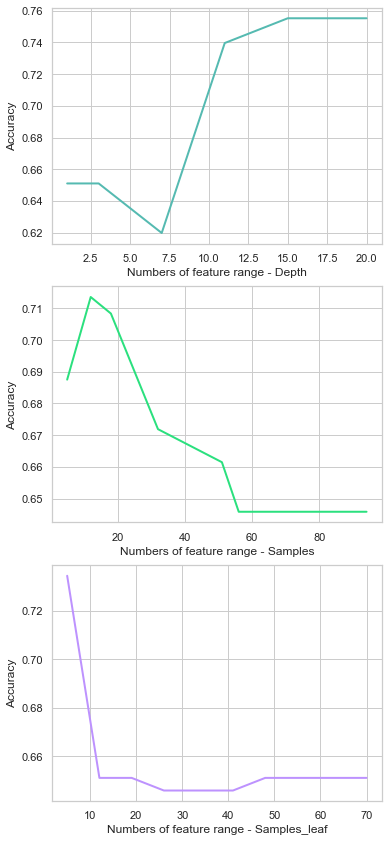

In [2136]:
plt.figure(figsize = (6, 12));
all_features = [tree_range, samples_split, samples_leaf];
all_scores = [tree_score, tree_split, tree_leaf];
all_names = ['Depth', 'Samples', 'Samples_leaf']
color = np.random.uniform(0, 1, size = (len(all_features), 3));
for i, feature in enumerate(all_features):
    plt.subplot(len(all_features), 1, i+1);
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad = 2.5);
    plt.plot(feature, all_scores[i], color = color[i], linewidth = 2.0);
    plt.xlabel('Numbers of feature range - %s' %all_names[i])
    plt.ylabel('Accuracy')
plt.show();

In [247]:
#2.15
import wget

In [2078]:
example = wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')

100% [..........................................................................] 1059371 / 1059371

In [2082]:
data = pd.read_table('nursery.data', delimiter = ',', header = None);

In [343]:
def two(X, y):
    #print(X);
    #print(y)
    if len(np.unique(X)) == 1:
        thresholds, ginis, threshold_best, gini_best = None, None, None, None
        return (thresholds, ginis, threshold_best, gini_best)
    #print(X)
    r_l_1, r_r_1, r_l_0, r_r_0 = [], [], [], [];
    t = (X[:-1] + X[1:]) / 2;
    t = np.unique(t)
    un = np.unique(y);
    #print(X)
    dele = []
    for i, m in enumerate(t):
        if (sum(X < m) == 0 or sum(X > m) == 0):#защита от пустого подмножества   
            dele.append(i);
            continue
        r_l_1.append(sum(y[np.where(X < m)] == un[1]));
        r_r_1.append(sum(y[np.where(X > m)] == un[1]));
        r_l_0.append(sum(y[np.where(X < m)] == un[0]));
        r_r_0.append(sum(y[np.where(X > m)] == un[0]));
    t = np.delete(t, dele)
    r_l_1, r_l_0 = np.asarray(r_l_1), np.asarray(r_l_0);  
    r_r_1, r_r_0 = np.asarray(r_r_1), np.asarray(r_r_0);
    H_r_l = 1 - (r_l_1 / (r_l_1+r_l_0))**2 - (r_l_0 / (r_l_1+r_l_0))**2;
    H_r_r = 1 - (r_r_1 / (r_r_1+r_r_0))**2 - (r_r_0 / (r_r_1+r_r_0))**2;
    Q = -((r_l_1 + r_l_0) / X.shape[0]) * H_r_l - ((r_r_1 + r_r_0) / X.shape[0]) * H_r_r;
    thresholds = np.sort(t);
    ginis = np.round(Q[np.argsort(t)], 3);
    #print(ginis)
    gini_best = max(ginis);
    threshold_best = thresholds[np.argmax(ginis)];
    if sum(ginis == gini_best) != 1:
        k = np.where(ginis == gini_best);
        thes_best = thresholds[k];
        r = []
        for m in thes_best:
            r.append((sum(X < m), sum(X > m)));
        r = np.asarray(r);
        k_min = np.argmin(np.amax(r, axis = 1) / np.amin(r, axis = 1));
     #print(gini_best)
    return (thresholds, ginis, threshold_best, gini_best)

In [335]:
#%%time
mushrooms = pd.read_table('agaricus-lepiota.data', header = None, delimiter = ',');
mushrooms = np.array(list(map(lambda x: LabelEncoder.fit_transform(mushrooms[x], mushrooms[x]), range(mushrooms.shape[1])))).T
mushrooms = pd.DataFrame(mushrooms);
#data = data.iloc[:2000, :];
X = mushrooms.drop(0, axis = 1);
y = mushrooms[0];
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42);
tree_mush = DecisionTree(X.dtypes.values, None, None, None);
#cv_mush = cross_val_score(estimator = tree_mush, X = X.values, y = y.values, scoring = make_scorer(accuracy_score), cv = 10);
#node_one = tree_mush.fit(X_train.values, y_train.values);
#accuracy_score(y_test, tree_mush.predict(X_test.values))

In [151]:
def cross(n, X, y, tree):
    accuracy = []
    range_X = np.linspace(0, X.shape[0], n+1, dtype = int);
    for i in range(len(range_X) - 1):
        test = np.arange(range_X[i], range_X[i+1]);
        train = np.logical_not(np.in1d(np.arange(X.shape[0]), test));
        tree.fit(X[train].values, y[train].values);
        accuracy.append(accuracy_score(y.values[test], tree.predict(X.values[test, :])));
    return accuracy

In [152]:
%%time
val_mush_thing = cross(10, X, y, tree_mush);

Wall time: 15min 47s


In [148]:
%%time
val_mush_categ = cross(10, X, y, tree_mush)

Wall time: 13min 22s


In [149]:
val_mush_categ

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9913793103448276, 1.0, 1.0, 1.0]

In [153]:
val_mush_thing

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.995079950799508]

In [206]:
hot = OneHotEncoder(handle_unknown = 'ignore', sparse = False).fit_transform(X).astype(int)

In [207]:
mushrooms_hot = pd.DataFrame(np.hstack((X, hot)));
for i in range(22, mushrooms_hot.shape[1]):
    mushrooms_hot[i] = mushrooms_hot[i].astype('int32')

In [210]:
%%time
tree_mush = DecisionTree(mushrooms_hot.dtypes.values, None, None, None)
val_mush_hot = cross(10, mushrooms_hot, y, tree_mush)

Wall time: 36min 21s


In [211]:
val_mush_hot

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9913793103448276, 1.0, 1.0, 1.0]

In [214]:
cv = StratifiedKFold(n_splits = 10, random_state= 42);

In [336]:
vak_skl = cross_val_score(DecisionTreeClassifier(), X, y, cv = cv, scoring = make_scorer(accuracy_score)) 

In [337]:
vak_skl

array([0.68511685, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.97044335, 1.        ])

In [249]:
#третий набор данных - cars
cars = wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data');

100% [..............................................................................] 51867 / 51867

In [407]:
cars = pd.read_table('car.data', delimiter = ',', header = None);

In [408]:
X = cars.drop(6, axis = 1);
X = np.array(list(map(lambda x: LabelEncoder.fit_transform(X[x], X[x]), range(X.shape[1])))).T
X = pd.DataFrame(X);

In [409]:
y = cars[6];

In [410]:
y[y == 'unacc'] = 1;
y[y == 'acc'] = 1;
y[y == 'good'] = 0;
y[y == 'vgood'] = 0;

In [411]:
y = y.astype('int');